<a href="https://colab.research.google.com/github/jona-lu/olist_project/blob/main/olist_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt
working_directory=os.getcwd()
print(working_directory)

/content


# New Section

In [ ]:
path=working_directory+'/sample_data/olist_customers_dataset.csv'
path1=working_directory+'/sample_data/olist_geolocation_dataset.csv'
path2=working_directory+'/sample_data/olist_order_items_dataset.csv'
path3=working_directory+'/sample_data/olist_order_payments_dataset.csv'
path4=working_directory+'/sample_data/olist_order_reviews_dataset.csv'
path5=working_directory+'/sample_data/olist_orders_dataset.csv'
path6=working_directory+'/sample_data/olist_products_dataset.csv'
path7=working_directory+'/sample_data/olist_sellers_dataset.csv'
path8=working_directory+'/sample_data/product_category_name_translation.csv'

olist_customers_dataset=pd.read_csv(path)
olist_geolocation_dataset=pd.read_csv(path1)
olist_order_items_dataset=pd.read_csv(path2)
olist_order_payments_dataset=pd.read_csv(path3)
olist_order_reviews_dataset=pd.read_csv(path4)
olist_orders_dataset=pd.read_csv(path5)
olist_products_dataset=pd.read_csv(path6)
olist_sellers_dataset=pd.read_csv(path7)
product_category_name_translation=pd.read_csv(path8)

In [ ]:
olist_orders_dataset = olist_orders_dataset.dropna()
olist_products_dataset= olist_products_dataset.dropna()
data=pd.merge(olist_orders_dataset,olist_order_items_dataset,how='inner',on=['order_id'])
data=pd.merge(data,olist_order_payments_dataset,how='inner',on=['order_id'])
data=pd.merge(data,olist_order_reviews_dataset,how='inner',on=['order_id'])
data=pd.merge(data,olist_customers_dataset,how='inner',on=['customer_id'])
data=pd.merge(data,olist_products_dataset,how='left',on=['product_id'])
data=pd.merge(data,product_category_name_translation,how='left',on=['product_category_name'])

In [ ]:
import datetime
data['order_approved_at']=pd.to_datetime(data.loc[:,'order_approved_at'])
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"])
data["order_delivered_carrier_date"] = pd.to_datetime(data["order_delivered_carrier_date"])
data['order_delivered_customer_date']=pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date']=pd.to_datetime(data['order_estimated_delivery_date'])
data['shipping_limit_date']=pd.to_datetime(data['shipping_limit_date'])
data['lead_time_po_approved']=(data['order_approved_at']-data['order_purchase_timestamp'])
data['lead_time_po_approved']=data['lead_time_po_approved']/np.timedelta64(1,'D') ##this is the key to turn into numeric days

data['lead_time_po_customer']=(data['order_delivered_carrier_date']-data['order_purchase_timestamp'])
data['lead_time_po_customer']=data['lead_time_po_customer']/np.timedelta64(1,'D') ##this is the key to turn into numeric days

data['promosied_actual']=(data['order_estimated_delivery_date']-data['order_delivered_customer_date'])
data['promosied_actual']=data['promosied_actual']/np.timedelta64(1,'D') ##this is the key to turn into numeric days

data['order_year']=pd.DatetimeIndex(data['order_purchase_timestamp']).year
data['order_month'] = pd.DatetimeIndex(data['order_purchase_timestamp']).month
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,lead_time_po_approved,lead_time_po_customer,promosied_actual,order_year,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,housewares,0.007431,2.373924,7.107488,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,housewares,0.007431,2.373924,7.107488,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,housewares,0.007431,2.373924,7.107488,2017,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,400.0,19.0,13.0,19.0,perfumery,1.279745,1.742627,5.355729,2018,7
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,420.0,24.0,19.0,21.0,auto,0.011505,0.216100,17.245498,2018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114837,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,4950.0,40.0,10.0,40.0,baby,0.008090,1.433148,1.265324,2018,2
114838,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,13300.0,32.0,90.0,22.0,home_appliances_2,0.012188,1.253970,5.524803,2017,8
114839,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,6550.0,20.0,20.0,20.0,computers_accessories,0.005486,3.754583,20.018819,2018,1
114840,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,6550.0,20.0,20.0,20.0,computers_accessories,0.005486,3.754583,20.018819,2018,1


In [ ]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'lead_time_po_approved',
       'lead_time_po_customer', 'promosied_actual', 'order_year',
       'order_month'],
   

In [ ]:
data.drop(data[data.order_year ==2016].index, inplace=True)

now we are going to use LSTM to predict sales

In [ ]:
df=data[['order_purchase_timestamp','price']].copy()
# change datetime to date 
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"]).dt.date

In [ ]:
# we need to group price then set date to be index for the following coding 
df=df.groupby(['order_purchase_timestamp']).sum()
df=df.add_suffix('_sum').reset_index()
# make purchase date as index 
# this is important to set freq ---here we use days but maybe we should use month? or week? need to think about it
df=df.set_index('order_purchase_timestamp').asfreq('d')
# make freq as date
#df.index.freq='DS' 

In [ ]:
df.tail()

,price_sum
order_purchase_timestamp,
2018-08-25,10711.93
2018-08-26,8295.61
2018-08-27,5373.66
2018-08-28,3757.51
2018-08-29,1546.04


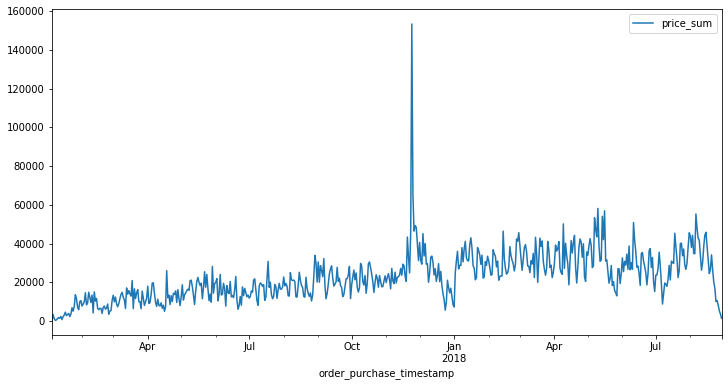

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
df.describe()

,price_sum
count,602.000000
mean,22778.982359
std,12603.266712
min,396.900000
25%,13726.260000
50%,21241.195000
75%,29898.045000
max,153406.220000


In [ ]:
df[df.price_sum>153406]
# christmas eve sales peak 

,price_sum
order_purchase_timestamp,
2017-11-24,153406.22


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


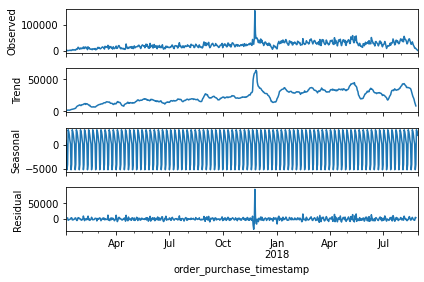

In [ ]:
results=seasonal_decompose(df['price_sum'])
results.plot();

In [ ]:
len(df)

602

In [ ]:
# now we are going to split data into train and test part 
train=df.iloc[:541]
test=df.iloc[541:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
#need to convert data into 0-1 

In [ ]:
df.head(),df.tail()

(                          price_sum
 order_purchase_timestamp           
 2017-01-05                   396.90
 2017-01-06                  3460.38
 2017-01-07                  1351.90
 2017-01-08                   449.78
 2017-01-09                   673.79,                           price_sum
 order_purchase_timestamp           
 2018-08-25                 10711.93
 2018-08-26                  8295.61
 2018-08-27                  5373.66
 2018-08-28                  3757.51
 2018-08-29                  1546.04)

In [ ]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.        ],
       [0.02002153],
       [0.00624145],
       [0.0003456 ],
       [0.00180963],
       [0.0067837 ],
       [0.00953125],
       [0.00706944],
       [0.01342258],
       [0.00306517]])

In [ ]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator 

In [ ]:
n_input=7 
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)


In [ ]:
X,y=generator[0]
print(f'Given the array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the array: 
[0.         0.02002153 0.00624145 0.0003456  0.00180963 0.0067837
 0.00953125]
Predict this y: 
 [[0.00706944]]


In [ ]:
X.shape

(1, 7, 1)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
534/534 [==============================] - 4s 4ms/step - loss: 0.0039
Epoch 2/50
534/534 [==============================] - 2s 4ms/step - loss: 0.0032
Epoch 3/50
534/534 [==============================] - 2s 4ms/step - loss: 0.0031
Epoch 4/50
534/534 [==============================] - 2s 4ms/step - loss: 0.0030
Epoch 5/50
534/534 [==============================] - 2s 4ms/step - loss: 0.0030
Epoch 6/50
534/534 [==============================] - 2s 4ms/step - loss: 0.0030
Epoch 7/50
534/534 [==============================] - 2s 4ms/step - loss: 0.0030
Epoch 8/50
534/534 [==============================] - 2s 4ms/step - loss: 0.0029
Epoch 9/50
534/534 [==============================] - 2s 4ms/step - loss: 0.0029
Epoch 10/50
534/534 [==============================] - 2s 4ms/step - loss: 0.0029
Epoch 11/50
534/534 [==============================] - 2s 4ms/step - loss: 0.0028
Epoch 12/50
534/534 [==============================] - 2s 4ms/step - loss: 0.0028
Epoch 13/50
534/534 [====

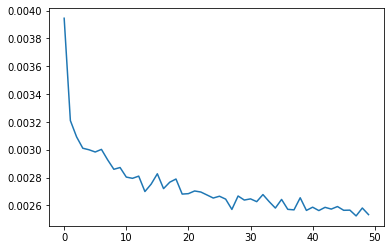

In [ ]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
# now do the actual prediction 
# use last 7 days to do the prediction
last_train_batch=scaled_train[-7:]


In [ ]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.13315761]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.09754229])

In [ ]:
test_predictions=[]

first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
  current_pred=model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.13315761], dtype=float32),
 array([0.14277981], dtype=float32),
 array([0.1730724], dtype=float32),
 array([0.18580261], dtype=float32),
 array([0.16516614], dtype=float32),
 array([0.16913901], dtype=float32),
 array([0.14412044], dtype=float32),
 array([0.13545406], dtype=float32),
 array([0.13442186], dtype=float32),
 array([0.14234683], dtype=float32),
 array([0.14847022], dtype=float32),
 array([0.1426737], dtype=float32),
 array([0.14114073], dtype=float32),
 array([0.13245189], dtype=float32),
 array([0.1264498], dtype=float32),
 array([0.12340607], dtype=float32),
 array([0.12374999], dtype=float32),
 array([0.12474531], dtype=float32),
 array([0.1227872], dtype=float32),
 array([0.12104929], dtype=float32),
 array([0.11751103], dtype=float32),
 array([0.11412115], dtype=float32),
 array([0.11157572], dtype=float32),
 array([0.11021677], dtype=float32),
 array([0.10944052], dtype=float32),
 array([0.10809646], dtype=float32),
 array([0.10664961], dtype=float32),
 arra

In [ ]:
true_predictions=scaler.inverse_transform(test_predictions)

In [ ]:
test['predictions']=true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


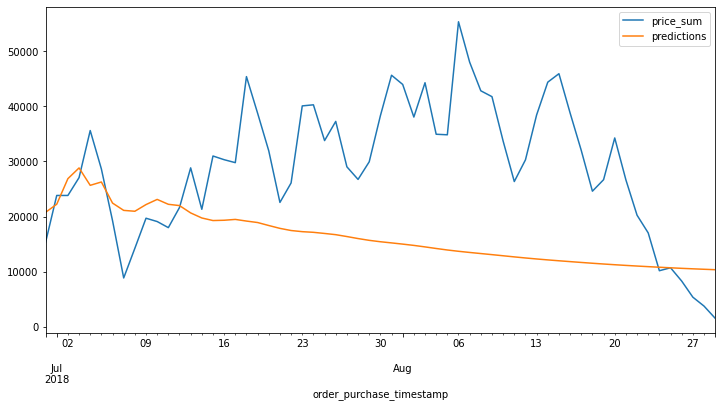

In [ ]:
test.plot(figsize=(12,6))

In [ ]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rmse=sqrt(mean_squared_error(test['price_sum'],test['predictions']))
print(rmse)

18125.662240442864
